In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('/content/drive/MyDrive/Prices.xlsx',
                 sheet_name='Daily',
                 usecols='A:B'
                #  index_col='Name'
                 )

In [4]:
df.head()

,Name,USD
0,1978-12-29,226.00
1,1979-01-01,226.00
2,1979-01-02,226.80
3,1979-01-03,218.60
4,1979-01-04,223.15


In [5]:
df.set_index('Name',inplace=True)

In [6]:
df = df.loc[(df.index.year > 2000), :]
df.index = pd.to_datetime(df.index)


In [7]:
df.head()

,USD
Name,
2001-01-01,274.45
2001-01-02,271.10
2001-01-03,267.15
2001-01-04,267.10
2001-01-05,267.40


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# metrics
from sklearn.metrics import mean_absolute_error

<Axes: xlabel='Name'>

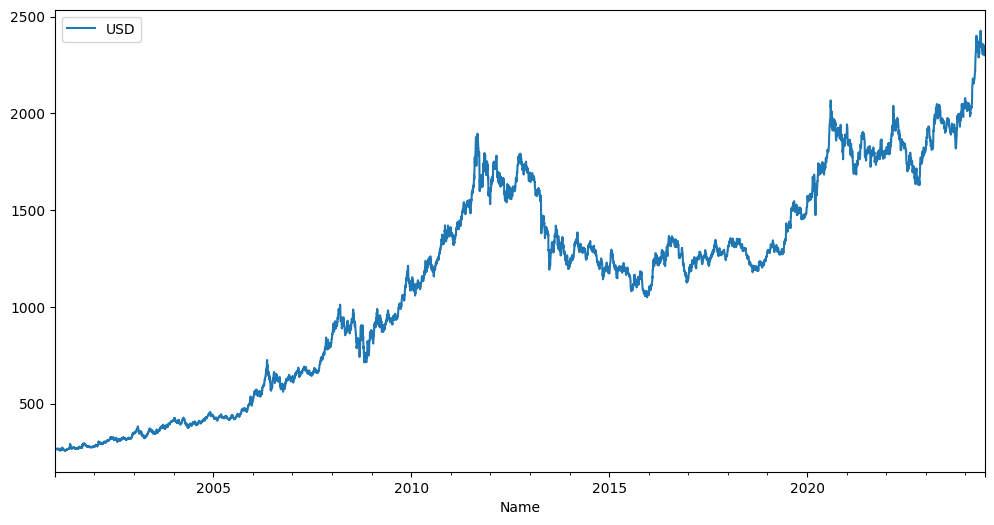

In [9]:
df[['USD']].plot(figsize=(12,6))

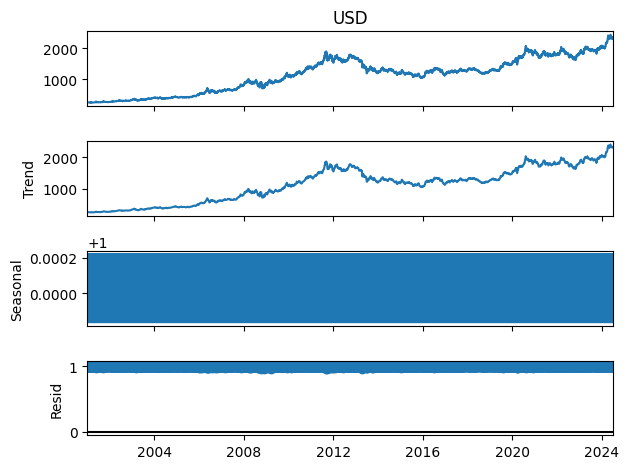

In [10]:
decompose_result = seasonal_decompose(df['USD'],model='multiplicative')
decompose_result.plot()
plt.show()

No Such visibility of any pattern

Checking seasonality through usual computation

In [11]:
y = np.log(df["USD"])
y.name = "USD"

In [12]:
seasonal_df = y.to_frame()
seasonal_df

,USD
Name,
2001-01-01,5.614769
2001-01-02,5.602488
2001-01-03,5.587810
2001-01-04,5.587623
2001-01-05,5.588746
...,...
2024-06-24,7.753087
2024-06-25,7.751497
2024-06-26,7.740512


In [13]:
seasonal_df["trend"] = seasonal_df["USD"].rolling(window=7, center=True).mean()
seasonal_df.head(10)

,USD,trend
Name,,
2001-01-01,5.614769,NaN
2001-01-02,5.602488,NaN
2001-01-03,5.587810,NaN
2001-01-04,5.587623,5.594399
2001-01-05,5.588746,5.590092
2001-01-08,5.592106,5.586382
2001-01-09,5.587249,5.584525
2001-01-10,5.584623,5.582587
2001-01-11,5.576517,5.581002


In [14]:
seasonal_df["detrended"] = seasonal_df["USD"]-seasonal_df["trend"]
seasonal_df.head(10)

,USD,trend,detrended
Name,,,
2001-01-01,5.614769,NaN,NaN
2001-01-02,5.602488,NaN,NaN
2001-01-03,5.587810,NaN,NaN
2001-01-04,5.587623,5.594399,-0.006776
2001-01-05,5.588746,5.590092,-0.001346
2001-01-08,5.592106,5.586382,0.005724
2001-01-09,5.587249,5.584525,0.002724
2001-01-10,5.584623,5.582587,0.002037
2001-01-11,5.576517,5.581002,-0.004485


In [15]:
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")
seasonal_df.head(15)

,USD,trend,detrended,month,seasonality
Name,,,,,
2001-01-01,5.614769,NaN,NaN,1,0.000085
2001-01-02,5.602488,NaN,NaN,1,0.000085
2001-01-03,5.587810,NaN,NaN,1,0.000085
2001-01-04,5.587623,5.594399,-0.006776,1,0.000085
2001-01-05,5.588746,5.590092,-0.001346,1,0.000085
2001-01-08,5.592106,5.586382,0.005724,1,0.000085
2001-01-09,5.587249,5.584525,0.002724,1,0.000085
2001-01-10,5.584623,5.582587,0.002037,1,0.000085
2001-01-11,5.576517,5.581002,-0.004485,1,0.000085


In [16]:
seasonal_df = y.to_frame()

# calculate the trend component
seasonal_df["trend"] = seasonal_df["USD"].rolling(window=7, center=True).mean()

# detrend the series
seasonal_df["detrended"] = seasonal_df["USD"] - seasonal_df["trend"]

# calculate the seasonal component
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")

# get the residuals
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]

# display the DF
seasonal_df.head(15)

,USD,trend,detrended,month,seasonality,resid
Name,,,,,,
2001-01-01,5.614769,NaN,NaN,1,0.000085,NaN
2001-01-02,5.602488,NaN,NaN,1,0.000085,NaN
2001-01-03,5.587810,NaN,NaN,1,0.000085,NaN
2001-01-04,5.587623,5.594399,-0.006776,1,0.000085,-0.006860
2001-01-05,5.588746,5.590092,-0.001346,1,0.000085,-0.001431
2001-01-08,5.592106,5.586382,0.005724,1,0.000085,0.005639
2001-01-09,5.587249,5.584525,0.002724,1,0.000085,0.002639
2001-01-10,5.584623,5.582587,0.002037,1,0.000085,0.001952
2001-01-11,5.576517,5.581002,-0.004485,1,0.000085,-0.004570


In [17]:
seasonal_df['trend']=np.exp(seasonal_df['trend'])
seasonal_df['seasonality']=np.exp(seasonal_df['seasonality'])
seasonal_df['resid']=np.exp(seasonal_df['resid'])

array([<Axes: xlabel='Name'>, <Axes: xlabel='Name'>,
       <Axes: xlabel='Name'>, <Axes: xlabel='Name'>], dtype=object)

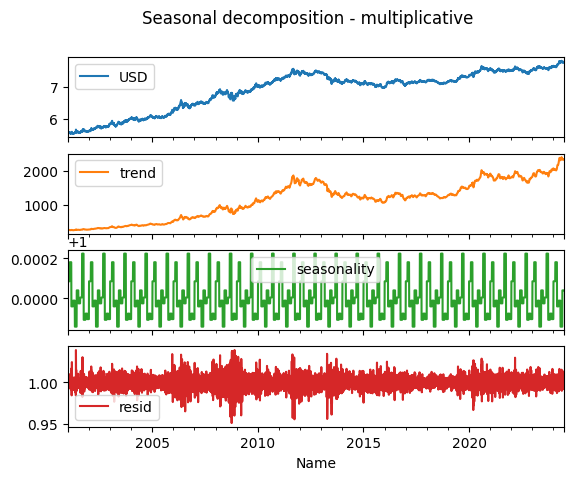

In [18]:
seasonal_df.loc[:, ["USD", "trend", "seasonality", "resid"]].plot(subplots=True, title="Seasonal decomposition - multiplicative")

In [19]:
df1=df['USD'].resample('MS').mean()
df1=pd.DataFrame(df1)
df1.head()

,USD
Name,
2001-01-01,265.876087
2001-02-01,261.865000
2001-03-01,263.027273
2001-04-01,260.361905
2001-05-01,272.273913


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


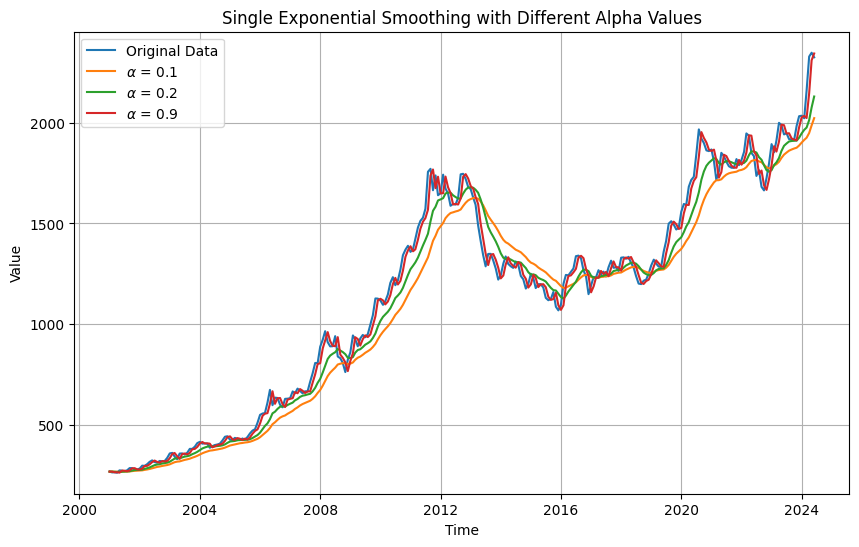

In [20]:
alphas = [0.1, 0.2,0.9]

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df1, label='Original Data')

# Plot smoothed curves for different alphas
for alpha in alphas:
    model = SimpleExpSmoothing(df1).fit(smoothing_level=alpha)
    smoothed_data = model.fittedvalues
    plt.plot(smoothed_data,label=r'$\alpha$ = {}'.format(alpha))

plt.title('Single Exponential Smoothing with Different Alpha Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

As we can see from the above plot that trend is captured very nicely, alpha=0.9 is better capturing

**Double Exponential smoothing**

it helps in capturing trend nicely

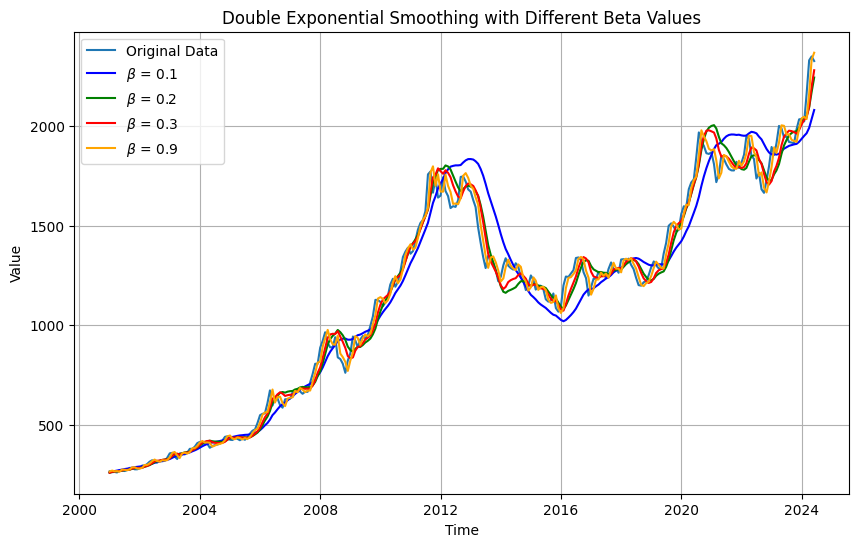

In [21]:
betas = [0.1, 0.2, 0.3, 0.9]

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df1, label='Original Data')

# Define colors for each beta value
colors = ['blue', 'green', 'red', 'orange']

# Plot smoothed curves for different betas with different colors
for beta, color in zip(betas, colors):
    model = ExponentialSmoothing(df1, trend='add').fit(smoothing_level=beta)
    smoothed_data = model.fittedvalues
    plt.plot(smoothed_data, label=r'$\beta$ = {}'.format(beta), color=color)

plt.title('Double Exponential Smoothing with Different Beta Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Higher Beta Values are capturing trend even more nicely

**Triple Exponential**
helps in capturing both trend and seasonality

In [22]:
len(df1)

282

In [23]:
df1.index.freq = 'MS'
train=df1[:-48]
test=df1[-48:]

In [24]:
len(train),len(test)

(234, 48)

In [25]:
def tes_optimizer(train, test, abg, trend_mode='add', seasonal_mode = 'mul', seasonal_period=12,step=len(test)):

  best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
  for comb in abg:
          tes_model = ExponentialSmoothing(train, trend=trend_mode, seasonal=seasonal_mode, seasonal_periods=seasonal_period).\
              fit(smoothing_level=comb[0], smoothing_trend=comb[1], smoothing_seasonal=comb[2])
          y_pred = tes_model.forecast(step)
          mae = mean_absolute_error(test, y_pred)
          if mae < best_mae:
              best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
          print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])
  print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
            "best_mae:", round(best_mae, 4))
  return best_alpha, best_beta, best_gamma, best_mae

In [26]:
# !pip install itertools
import itertools

In [27]:
alphas = betas = gammas = np.arange(0.1, 1, 0.10)
abg = list(itertools.product(alphas, betas, gammas))

In [28]:
best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train,test, abg)

[0.1, 0.1, 0.1, 223.2]
[0.1, 0.1, 0.2, 236.62]
[0.1, 0.1, 0.3, 250.71]
[0.1, 0.1, 0.4, 264.94]
[0.1, 0.1, 0.5, 277.52]
[0.1, 0.1, 0.6, 287.92]
[0.1, 0.1, 0.7, 295.98]
[0.1, 0.1, 0.8, 302.12]
[0.1, 0.1, 0.9, 307.29]
[0.1, 0.2, 0.1, 579.56]
[0.1, 0.2, 0.2, 578.75]
[0.1, 0.2, 0.3, 583.18]
[0.1, 0.2, 0.4, 587.21]
[0.1, 0.2, 0.5, 588.84]
[0.1, 0.2, 0.6, 586.26]
[0.1, 0.2, 0.7, 578.72]
[0.1, 0.2, 0.8, 566.82]
[0.1, 0.2, 0.9, 551.13]
[0.1, 0.3, 0.1, 800.15]
[0.1, 0.3, 0.2, 781.17]
[0.1, 0.3, 0.3, 770.82]
[0.1, 0.3, 0.4, 760.02]
[0.1, 0.3, 0.5, 744.89]
[0.1, 0.3, 0.6, 720.86]
[0.1, 0.3, 0.7, 684.8]
[0.1, 0.3, 0.8, 634.59]
[0.1, 0.3, 0.9, 563.46]
[0.1, 0.4, 0.1, 865.0]
[0.1, 0.4, 0.2, 828.57]
[0.1, 0.4, 0.3, 810.44]
[0.1, 0.4, 0.4, 791.64]
[0.1, 0.4, 0.5, 758.36]
[0.1, 0.4, 0.6, 695.45]
[0.1, 0.4, 0.7, 593.31]
[0.1, 0.4, 0.8, 438.41]
[0.1, 0.4, 0.9, 209.74]
[0.1, 0.5, 0.1, 833.77]
[0.1, 0.5, 0.2, 798.95]
[0.1, 0.5, 0.3, 774.88]
[0.1, 0.5, 0.4, 727.04]
[0.1, 0.5, 0.5, 627.56]
[0.1, 0.5, 0.6, 457

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.1, 0.7, 0.9, 7105.28]
[0.1, 0.8, 0.1, 339.55]
[0.1, 0.8, 0.2, 155.73]
[0.1, 0.8, 0.3, 93.99]
[0.1, 0.8, 0.4, 191.49]
[0.1, 0.8, 0.5, 289.78]
[0.1, 0.8, 0.6, 296.4]
[0.1, 0.8, 0.7, 151.51]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.1, 0.8, 0.8, 6061.75]
[0.1, 0.8, 0.9, 11424.06]
[0.1, 0.9, 0.1, 93.0]
[0.1, 0.9, 0.2, 122.05]
[0.1, 0.9, 0.3, 118.52]
[0.1, 0.9, 0.4, 127.88]
[0.1, 0.9, 0.5, 240.27]
[0.1, 0.9, 0.6, 338.27]
[0.1, 0.9, 0.7, 21370.29]
[0.1, 0.9, 0.8, 14464.98]
[0.1, 0.9, 0.9, 14062.22]
[0.2, 0.1, 0.1, 391.7]
[0.2, 0.1, 0.2, 383.32]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.2, 0.1, 0.3, 383.65]
[0.2, 0.1, 0.4, 386.95]
[0.2, 0.1, 0.5, 392.02]
[0.2, 0.1, 0.6, 394.82]
[0.2, 0.1, 0.7, 387.8]
[0.2, 0.1, 0.8, 365.01]
[0.2, 0.1, 0.9, 327.01]
[0.2, 0.2, 0.1, 636.79]
[0.2, 0.2, 0.2, 603.17]
[0.2, 0.2, 0.3, 591.61]
[0.2, 0.2, 0.4, 590.27]
[0.2, 0.2, 0.5, 596.22]
[0.2, 0.2, 0.6, 590.89]
[0.2, 0.2, 0.7, 546.5]
[0.2, 0.2, 0.8, 450.02]
[0.2, 0.2, 0.9, 321.46]
[0.2, 0.3, 0.1, 650.02]
[0.2, 0.3, 0.2, 595.49]
[0.2, 0.3, 0.3, 583.69]
[0.2, 0.3, 0.4, 605.48]
[0.2, 0.3, 0.5, 658.24]
[0.2, 0.3, 0.6, 673.19]
[0.2, 0.3, 0.7, 555.97]
[0.2, 0.3, 0.8, 276.84]
[0.2, 0.3, 0.9, 142.63]
[0.2, 0.4, 0.1, 557.81]
[0.2, 0.4, 0.2, 501.93]
[0.2, 0.4, 0.3, 528.77]
[0.2, 0.4, 0.4, 672.19]
[0.2, 0.4, 0.5, 942.19]
[0.2, 0.4, 0.6, 1080.19]
[0.2, 0.4, 0.7, 762.35]
[0.2, 0.4, 0.8, 288.12]
[0.2, 0.4, 0.9, 176.79]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.2, 0.5, 0.1, 489.63]
[0.2, 0.5, 0.2, 461.55]
[0.2, 0.5, 0.3, 569.2]
[0.2, 0.5, 0.4, 1084.37]
[0.2, 0.5, 0.5, 2092.08]
[0.2, 0.5, 0.6, 2402.75]
[0.2, 0.5, 0.7, 1628.08]
[0.2, 0.5, 0.8, 19699.79]
[0.2, 0.5, 0.9, 15669.61]
[0.2, 0.6, 0.1, 515.51]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.2, 0.6, 0.2, 473.99]
[0.2, 0.6, 0.3, 541.41]
[0.2, 0.6, 0.4, 1773.71]
[0.2, 0.6, 0.5, 3102.44]
[0.2, 0.6, 0.6, 9235.25]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.2, 0.6, 0.7, 1874.0]
[0.2, 0.6, 0.8, 19998.56]
[0.2, 0.6, 0.9, 20820.95]
[0.2, 0.7, 0.1, 579.09]
[0.2, 0.7, 0.2, 335.7]
[0.2, 0.7, 0.3, 134.42]
[0.2, 0.7, 0.4, 1330.28]
[0.2, 0.7, 0.5, 944414.3]
[0.2, 0.7, 0.6, 13861.65]
[0.2, 0.7, 0.7, 5417.69]
[0.2, 0.7, 0.8, 12728.21]
[0.2, 0.7, 0.9, 25171.6]
[0.2, 0.8, 0.1, 626.25]
[0.2, 0.8, 0.2, 103.32]
[0.2, 0.8, 0.3, 6673.65]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.2, 0.8, 0.4, 23297.09]
[0.2, 0.8, 0.5, 152980.82]
[0.2, 0.8, 0.6, 55488.68]
[0.2, 0.8, 0.7, 92677.79]
[0.2, 0.8, 0.8, 5117.77]
[0.2, 0.8, 0.9, 14959.12]
[0.2, 0.9, 0.1, 718.43]
[0.2, 0.9, 0.2, 118.43]
[0.2, 0.9, 0.3, 1173227.42]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.2, 0.9, 0.4, 32085.1]
[0.2, 0.9, 0.5, 2964.31]
[0.2, 0.9, 0.6, 159282.19]
[0.2, 0.9, 0.7, 8106.66]
[0.2, 0.9, 0.8, 62998.99]
[0.2, 0.9, 0.9, 36885.81]
[0.3, 0.1, 0.1, 433.01]
[0.3, 0.1, 0.2, 409.13]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.3, 0.1, 0.3, 399.98]
[0.3, 0.1, 0.4, 398.46]
[0.3, 0.1, 0.5, 409.44]
[0.3, 0.1, 0.6, 447.9]
[0.3, 0.1, 0.7, 509.75]
[0.3, 0.1, 0.8, 565.67]
[0.3, 0.1, 0.9, 574.37]
[0.3, 0.2, 0.1, 613.19]
[0.3, 0.2, 0.2, 558.91]
[0.3, 0.2, 0.3, 535.75]
[0.3, 0.2, 0.4, 525.94]
[0.3, 0.2, 0.5, 578.76]
[0.3, 0.2, 0.6, 787.81]
[0.3, 0.2, 0.7, 1109.02]
[0.3, 0.2, 0.8, 1351.2]
[0.3, 0.2, 0.9, 1318.2]
[0.3, 0.3, 0.1, 634.48]
[0.3, 0.3, 0.2, 553.28]
[0.3, 0.3, 0.3, 497.68]
[0.3, 0.3, 0.4, 425.24]
[0.3, 0.3, 0.5, 587.83]
[0.3, 0.3, 0.6, 1254.31]
[0.3, 0.3, 0.7, 1968.69]
[0.3, 0.3, 0.8, 2156.31]
[0.3, 0.3, 0.9, 1814.29]
[0.3, 0.4, 0.1, 669.02]
[0.3, 0.4, 0.2, 544.44]
[0.3, 0.4, 0.3, 347.76]
[0.3, 0.4, 0.4, 117.1]
[0.3, 0.4, 0.5, 342.33]
[0.3, 0.4, 0.6, 1194.28]
[0.3, 0.4, 0.7, 81363.19]
[0.3, 0.4, 0.8, 823755.73]
[0.3, 0.4, 0.9, 84181.95]
[0.3, 0.5, 0.1, 768.52]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.3, 0.5, 0.2, 576.83]
[0.3, 0.5, 0.3, 187.93]
[0.3, 0.5, 0.4, 192.81]
[0.3, 0.5, 0.5, 36881.05]
[0.3, 0.5, 0.6, 17654.1]
[0.3, 0.5, 0.7, 11147.22]
[0.3, 0.5, 0.8, 31312.89]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.3, 0.5, 0.9, 36816.02]
[0.3, 0.6, 0.1, 927.62]
[0.3, 0.6, 0.2, 707.87]
[0.3, 0.6, 0.3, 320.37]
[0.3, 0.6, 0.4, 17883.98]
[0.3, 0.6, 0.5, 15618.11]
[0.3, 0.6, 0.6, 502501.45]
[0.3, 0.6, 0.7, 10068.31]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.3, 0.6, 0.8, 514955.94]
[0.3, 0.6, 0.9, 68858.96]
[0.3, 0.7, 0.1, 1122.46]
[0.3, 0.7, 0.2, 925.77]
[0.3, 0.7, 0.3, 3283.38]
[0.3, 0.7, 0.4, 30456.7]
[0.3, 0.7, 0.5, 11107.03]
[0.3, 0.7, 0.6, 343959.88]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.3, 0.7, 0.7, 872948.9]
[0.3, 0.7, 0.8, 62721.6]
[0.3, 0.7, 0.9, 18421.72]
[0.3, 0.8, 0.1, 1311.05]
[0.3, 0.8, 0.2, 1135.76]
[0.3, 0.8, 0.3, 5046.35]
[0.3, 0.8, 0.4, 41836.71]
[0.3, 0.8, 0.5, 2522.92]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.3, 0.8, 0.6, 144054.2]
[0.3, 0.8, 0.7, 215892.53]
[0.3, 0.8, 0.8, 44191.24]
[0.3, 0.8, 0.9, 21456.95]
[0.3, 0.9, 0.1, 1462.24]
[0.3, 0.9, 0.2, 1286.39]
[0.3, 0.9, 0.3, 12150.45]
[0.3, 0.9, 0.4, 448711.34]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.3, 0.9, 0.5, 263739.53]
[0.3, 0.9, 0.6, 30468.51]
[0.3, 0.9, 0.7, 37126.36]
[0.3, 0.9, 0.8, 24449.83]
[0.3, 0.9, 0.9, 21465.75]
[0.4, 0.1, 0.1, 459.73]
[0.4, 0.1, 0.2, 426.44]
[0.4, 0.1, 0.3, 401.86]
[0.4, 0.1, 0.4, 381.49]
[0.4, 0.1, 0.5, 358.01]
[0.4, 0.1, 0.6, 357.65]
[0.4, 0.1, 0.7, 434.44]
[0.4, 0.1, 0.8, 616.13]
[0.4, 0.1, 0.9, 845.01]
[0.4, 0.2, 0.1, 646.93]
[0.4, 0.2, 0.2, 579.89]
[0.4, 0.2, 0.3, 516.26]
[0.4, 0.2, 0.4, 427.91]
[0.4, 0.2, 0.5, 316.43]
[0.4, 0.2, 0.6, 314.9]
[0.4, 0.2, 0.7, 563.81]
[0.4, 0.2, 0.8, 983.1]
[0.4, 0.2, 0.9, 1338.79]
[0.4, 0.3, 0.1, 739.4]
[0.4, 0.3, 0.2, 643.25]
[0.4, 0.3, 0.3, 509.58]
[0.4, 0.3, 0.4, 292.91]
[0.4, 0.3, 0.5, 122.17]
[0.4, 0.3, 0.6, 143.5]
[0.4, 0.3, 0.7, 7786.47]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.4, 0.3, 0.8, 74568.21]
[0.4, 0.3, 0.9, 11682.36]
[0.4, 0.4, 0.1, 865.06]
[0.4, 0.4, 0.2, 753.38]
[0.4, 0.4, 0.3, 554.91]
[0.4, 0.4, 0.4, 292.68]
[0.4, 0.4, 0.5, 4071.92]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.4, 0.4, 0.6, 117785.04]
[0.4, 0.4, 0.7, 412934.69]
[0.4, 0.4, 0.8, 104859.48]
[0.4, 0.4, 0.9, 80020.07]
[0.4, 0.5, 0.1, 1024.81]
[0.4, 0.5, 0.2, 915.85]
[0.4, 0.5, 0.3, 696.75]
[0.4, 0.5, 0.4, 454.27]
[0.4, 0.5, 0.5, 35961.93]
[0.4, 0.5, 0.6, 1492147.42]
[0.4, 0.5, 0.7, 301800.74]
[0.4, 0.5, 0.8, 23546.34]
[0.4, 0.5, 0.9, 12196.26]
[0.4, 0.6, 0.1, 1177.87]
[0.4, 0.6, 0.2, 1066.03]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.4, 0.6, 0.3, 829.36]
[0.4, 0.6, 0.4, 4443.25]
[0.4, 0.6, 0.5, 5360.13]
[0.4, 0.6, 0.6, 21795.11]
[0.4, 0.6, 0.7, 33125.87]
[0.4, 0.6, 0.8, 1603284.95]
[0.4, 0.6, 0.9, 29453.77]
[0.4, 0.7, 0.1, 1288.52]
[0.4, 0.7, 0.2, 1154.62]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.4, 0.7, 0.3, 882.24]
[0.4, 0.7, 0.4, 11588.79]
[0.4, 0.7, 0.5, 24656.08]
[0.4, 0.7, 0.6, 383739.66]
[0.4, 0.7, 0.7, 42005.48]
[0.4, 0.7, 0.8, 4146.01]
[0.4, 0.7, 0.9, 3326941.29]
[0.4, 0.8, 0.1, 1340.51]
[0.4, 0.8, 0.2, 1166.23]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.4, 0.8, 0.3, 1601.72]
[0.4, 0.8, 0.4, 8841.56]
[0.4, 0.8, 0.5, 47513.33]
[0.4, 0.8, 0.6, 60010.91]
[0.4, 0.8, 0.7, 25559.84]
[0.4, 0.8, 0.8, 15460.13]
[0.4, 0.8, 0.9, 119860.98]
[0.4, 0.9, 0.1, 1330.83]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.4, 0.9, 0.2, 1104.24]
[0.4, 0.9, 0.3, 929.06]
[0.4, 0.9, 0.4, 2954.04]
[0.4, 0.9, 0.5, 25764.36]
[0.4, 0.9, 0.6, 37862.22]
[0.4, 0.9, 0.7, 30398.0]
[0.4, 0.9, 0.8, 14201.9]
[0.4, 0.9, 0.9, 97760.57]
[0.5, 0.1, 0.1, 483.78]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.5, 0.1, 0.2, 450.12]
[0.5, 0.1, 0.3, 411.79]
[0.5, 0.1, 0.4, 372.64]
[0.5, 0.1, 0.5, 320.53]
[0.5, 0.1, 0.6, 259.45]
[0.5, 0.1, 0.7, 229.94]
[0.5, 0.1, 0.8, 274.57]
[0.5, 0.1, 0.9, 397.69]
[0.5, 0.2, 0.1, 692.08]
[0.5, 0.2, 0.2, 632.67]
[0.5, 0.2, 0.3, 550.91]
[0.5, 0.2, 0.4, 440.88]
[0.5, 0.2, 0.5, 295.34]
[0.5, 0.2, 0.6, 166.98]
[0.5, 0.2, 0.7, 143.14]
[0.5, 0.2, 0.8, 183.54]
[0.5, 0.2, 0.9, 5437.35]
[0.5, 0.3, 0.1, 822.55]
[0.5, 0.3, 0.2, 753.38]
[0.5, 0.3, 0.3, 628.47]
[0.5, 0.3, 0.4, 456.02]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.5, 0.3, 0.5, 268.95]
[0.5, 0.3, 0.6, 139.32]
[0.5, 0.3, 0.7, 4531.56]
[0.5, 0.3, 0.8, 48965.12]
[0.5, 0.3, 0.9, 83260.4]
[0.5, 0.4, 0.1, 957.7]
[0.5, 0.4, 0.2, 888.28]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.5, 0.4, 0.3, 729.17]
[0.5, 0.4, 0.4, 529.42]
[0.5, 0.4, 0.5, 335.77]
[0.5, 0.4, 0.6, 27891.68]
[0.5, 0.4, 0.7, 72914.72]
[0.5, 0.4, 0.8, 84100.4]
[0.5, 0.4, 0.9, 19916.33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.5, 0.5, 0.1, 1075.96]
[0.5, 0.5, 0.2, 998.14]
[0.5, 0.5, 0.3, 801.26]
[0.5, 0.5, 0.4, 572.6]
[0.5, 0.5, 0.5, 5940.13]
[0.5, 0.5, 0.6, 9172.39]
[0.5, 0.5, 0.7, 20061.31]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.5, 0.5, 0.8, 48048.13]
[0.5, 0.5, 0.9, 285781.12]
[0.5, 0.6, 0.1, 1147.2]
[0.5, 0.6, 0.2, 1047.52]
[0.5, 0.6, 0.3, 800.95]
[0.5, 0.6, 0.4, 3750.36]
[0.5, 0.6, 0.5, 11212.8]
[0.5, 0.6, 0.6, 51847.79]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.5, 0.6, 0.7, 63726.95]
[0.5, 0.6, 0.8, 13256.36]
[0.5, 0.6, 0.9, 39579.68]
[0.5, 0.7, 0.1, 1161.61]
[0.5, 0.7, 0.2, 1032.85]
[0.5, 0.7, 0.3, 730.02]
[0.5, 0.7, 0.4, 1711.8]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.5, 0.7, 0.5, 6582.76]
[0.5, 0.7, 0.6, 44897.85]
[0.5, 0.7, 0.7, 64775.81]
[0.5, 0.7, 0.8, 41423.28]
[0.5, 0.7, 0.9, 71635.9]
[0.5, 0.8, 0.1, 1126.4]
[0.5, 0.8, 0.2, 972.51]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.5, 0.8, 0.3, 617.51]
[0.5, 0.8, 0.4, 975.96]
[0.5, 0.8, 0.5, 956.75]
[0.5, 0.8, 0.6, 6999.29]
[0.5, 0.8, 0.7, 27334.96]
[0.5, 0.8, 0.8, 313529.31]
[0.5, 0.8, 0.9, 15046.62]
[0.5, 0.9, 0.1, 1059.82]
[0.5, 0.9, 0.2, 895.51]
[0.5, 0.9, 0.3, 506.43]
[0.5, 0.9, 0.4, 234.47]
[0.5, 0.9, 0.5, 3163.28]
[0.5, 0.9, 0.6, 8701.24]
[0.5, 0.9, 0.7, 1528151.53]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.5, 0.9, 0.8, 99523.64]
[0.5, 0.9, 0.9, 87002.98]
[0.6, 0.1, 0.1, 500.79]
[0.6, 0.1, 0.2, 472.2]
[0.6, 0.1, 0.3, 430.02]
[0.6, 0.1, 0.4, 380.65]
[0.6, 0.1, 0.5, 321.01]
[0.6, 0.1, 0.6, 245.79]
[0.6, 0.1, 0.7, 173.94]
[0.6, 0.1, 0.8, 145.37]
[0.6, 0.1, 0.9, 147.99]
[0.6, 0.2, 0.1, 718.73]
[0.6, 0.2, 0.2, 674.81]
[0.6, 0.2, 0.3, 596.5]
[0.6, 0.2, 0.4, 491.77]
[0.6, 0.2, 0.5, 366.35]
[0.6, 0.2, 0.6, 230.73]
[0.6, 0.2, 0.7, 131.89]
[0.6, 0.2, 0.8, 113.12]
[0.6, 0.2, 0.9, 4754.44]
[0.6, 0.3, 0.1, 850.27]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.6, 0.3, 0.2, 805.6]
[0.6, 0.3, 0.3, 694.93]
[0.6, 0.3, 0.4, 546.65]
[0.6, 0.3, 0.5, 387.2]
[0.6, 0.3, 0.6, 230.19]
[0.6, 0.3, 0.7, 118.65]
[0.6, 0.3, 0.8, 77232.99]
[0.6, 0.3, 0.9, 25618.63]
[0.6, 0.4, 0.1, 956.15]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.6, 0.4, 0.2, 909.67]
[0.6, 0.4, 0.3, 764.38]
[0.6, 0.4, 0.4, 578.09]
[0.6, 0.4, 0.5, 395.76]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.6, 0.4, 0.6, 3659.04]
[0.6, 0.4, 0.7, 6244.17]
[0.6, 0.4, 0.8, 59751.63]
[0.6, 0.4, 0.9, 40773.68]
[0.6, 0.5, 0.1, 1019.99]
[0.6, 0.5, 0.2, 966.32]
[0.6, 0.5, 0.3, 779.02]
[0.6, 0.5, 0.4, 555.22]
[0.6, 0.5, 0.5, 358.53]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.6, 0.5, 0.6, 10588.07]
[0.6, 0.5, 0.7, 54653.41]
[0.6, 0.5, 0.8, 19574.77]
[0.6, 0.5, 0.9, 42195.3]
[0.6, 0.6, 0.1, 1032.5]
[0.6, 0.6, 0.2, 971.56]
[0.6, 0.6, 0.3, 743.69]
[0.6, 0.6, 0.4, 494.1]
[0.6, 0.6, 0.5, 2258.21]
[0.6, 0.6, 0.6, 6488.65]
[0.6, 0.6, 0.7, 175460.91]
[0.6, 0.6, 0.8, 65262.48]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.6, 0.6, 0.9, 31190.28]
[0.6, 0.7, 0.1, 1001.41]
[0.6, 0.7, 0.2, 941.85]
[0.6, 0.7, 0.3, 688.99]
[0.6, 0.7, 0.4, 436.26]
[0.6, 0.7, 0.5, 734.32]
[0.6, 0.7, 0.6, 3831.59]
[0.6, 0.7, 0.7, 15670.27]
[0.6, 0.7, 0.8, 23029.07]
[0.6, 0.7, 0.9, 1825.3]
[0.6, 0.8, 0.1, 942.13]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.6, 0.8, 0.2, 895.18]
[0.6, 0.8, 0.3, 641.73]
[0.6, 0.8, 0.4, 406.33]
[0.6, 0.8, 0.5, 261.69]
[0.6, 0.8, 0.6, 27308.76]
[0.6, 0.8, 0.7, 383508.23]
[0.6, 0.8, 0.8, 151110.48]
[0.6, 0.8, 0.9, 47665.44]
[0.6, 0.9, 0.1, 868.25]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.6, 0.9, 0.2, 836.33]
[0.6, 0.9, 0.3, 601.37]
[0.6, 0.9, 0.4, 393.16]
[0.6, 0.9, 0.5, 657.7]
[0.6, 0.9, 0.6, 80724.34]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.6, 0.9, 0.7, 57414.81]
[0.6, 0.9, 0.8, 37437.55]
[0.6, 0.9, 0.9, 75259.55]
[0.7, 0.1, 0.1, 509.01]
[0.7, 0.1, 0.2, 486.43]
[0.7, 0.1, 0.3, 447.4]
[0.7, 0.1, 0.4, 395.71]
[0.7, 0.1, 0.5, 337.39]
[0.7, 0.1, 0.6, 266.86]
[0.7, 0.1, 0.7, 187.89]
[0.7, 0.1, 0.8, 130.71]
[0.7, 0.1, 0.9, 120.66]
[0.7, 0.2, 0.1, 723.67]
[0.7, 0.2, 0.2, 693.06]
[0.7, 0.2, 0.3, 625.79]
[0.7, 0.2, 0.4, 529.83]
[0.7, 0.2, 0.5, 421.95]
[0.7, 0.2, 0.6, 304.27]
[0.7, 0.2, 0.7, 185.72]
[0.7, 0.2, 0.8, 114.3]
[0.7, 0.2, 0.9, 6948.29]
[0.7, 0.3, 0.1, 838.47]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.7, 0.3, 0.2, 810.18]
[0.7, 0.3, 0.3, 718.93]
[0.7, 0.3, 0.4, 584.03]
[0.7, 0.3, 0.5, 446.34]
[0.7, 0.3, 0.6, 310.32]
[0.7, 0.3, 0.7, 557.02]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.7, 0.3, 0.8, 8194.86]
[0.7, 0.3, 0.9, 35202.6]
[0.7, 0.4, 0.1, 908.33]
[0.7, 0.4, 0.2, 881.01]
[0.7, 0.4, 0.3, 765.09]
[0.7, 0.4, 0.4, 596.47]
[0.7, 0.4, 0.5, 443.13]
[0.7, 0.4, 0.6, 311.41]
[0.7, 0.4, 0.7, 8136.75]
[0.7, 0.4, 0.8, 70511.49]
[0.7, 0.4, 0.9, 42841.05]
[0.7, 0.5, 0.1, 928.87]
[0.7, 0.5, 0.2, 901.36]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.7, 0.5, 0.3, 765.12]
[0.7, 0.5, 0.4, 578.23]
[0.7, 0.5, 0.5, 427.69]
[0.7, 0.5, 0.6, 313.18]
[0.7, 0.5, 0.7, 6297.14]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.7, 0.5, 0.8, 46174.63]
[0.7, 0.5, 0.9, 28094.98]
[0.7, 0.6, 0.1, 902.63]
[0.7, 0.6, 0.2, 875.69]
[0.7, 0.6, 0.3, 732.28]
[0.7, 0.6, 0.4, 552.32]
[0.7, 0.6, 0.5, 416.89]
[0.7, 0.6, 0.6, 1875.96]
[0.7, 0.6, 0.7, 8528.69]
[0.7, 0.6, 0.8, 1555194.07]
[0.7, 0.6, 0.9, 82509.3]
[0.7, 0.7, 0.1, 840.38]
[0.7, 0.7, 0.2, 810.88]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.7, 0.7, 0.3, 672.73]
[0.7, 0.7, 0.4, 528.37]
[0.7, 0.7, 0.5, 4424.45]
[0.7, 0.7, 0.6, 7527.26]
[0.7, 0.7, 0.7, 225931.23]
[0.7, 0.7, 0.8, 85929.46]
[0.7, 0.7, 0.9, 9323.54]
[0.7, 0.8, 0.1, 752.54]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.7, 0.8, 0.2, 707.11]
[0.7, 0.8, 0.3, 578.65]
[0.7, 0.8, 0.4, 510.22]
[0.7, 0.8, 0.5, 13411.53]
[0.7, 0.8, 0.6, 70920.78]
[0.7, 0.8, 0.7, 21429.96]
[0.7, 0.8, 0.8, 14856.23]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.7, 0.8, 0.9, 9034077.73]
[0.7, 0.9, 0.1, 645.4]
[0.7, 0.9, 0.2, 561.37]
[0.7, 0.9, 0.3, 443.37]
[0.7, 0.9, 0.4, 2659.79]
[0.7, 0.9, 0.5, 17705.55]
[0.7, 0.9, 0.6, 83718.09]
[0.7, 0.9, 0.7, 119666.48]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.7, 0.9, 0.8, 61198.85]
[0.7, 0.9, 0.9, 75656.33]
[0.8, 0.1, 0.1, 509.44]
[0.8, 0.1, 0.2, 491.37]
[0.8, 0.1, 0.3, 459.01]
[0.8, 0.1, 0.4, 410.72]
[0.8, 0.1, 0.5, 357.4]
[0.8, 0.1, 0.6, 296.78]
[0.8, 0.1, 0.7, 225.62]
[0.8, 0.1, 0.8, 158.61]
[0.8, 0.1, 0.9, 117.84]
[0.8, 0.2, 0.1, 712.17]
[0.8, 0.2, 0.2, 689.61]
[0.8, 0.2, 0.3, 638.2]
[0.8, 0.2, 0.4, 555.14]
[0.8, 0.2, 0.5, 465.94]
[0.8, 0.2, 0.6, 370.55]
[0.8, 0.2, 0.7, 274.29]
[0.8, 0.2, 0.8, 205.74]
[0.8, 0.2, 0.9, 153.82]
[0.8, 0.3, 0.1, 803.24]
[0.8, 0.3, 0.2, 782.68]
[0.8, 0.3, 0.3, 718.26]
[0.8, 0.3, 0.4, 608.47]
[0.8, 0.3, 0.5, 504.47]
[0.8, 0.3, 0.6, 395.44]
[0.8, 0.3, 0.7, 317.42]
[0.8, 0.3, 0.8, 2594.58]
[0.8, 0.3, 0.9, 3208.48]
[0.8, 0.4, 0.1, 838.53]
[0.8, 0.4, 0.2, 816.21]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.8, 0.4, 0.3, 741.19]
[0.8, 0.4, 0.4, 619.73]
[0.8, 0.4, 0.5, 525.27]
[0.8, 0.4, 0.6, 403.6]
[0.8, 0.4, 0.7, 377.99]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.8, 0.4, 0.8, 7656.66]
[0.8, 0.4, 0.9, 53539.31]
[0.8, 0.5, 0.1, 822.14]
[0.8, 0.5, 0.2, 791.96]
[0.8, 0.5, 0.3, 709.11]
[0.8, 0.5, 0.4, 599.92]
[0.8, 0.5, 0.5, 543.75]
[0.8, 0.5, 0.6, 333.8]
[0.8, 0.5, 0.7, 8068.86]
[0.8, 0.5, 0.8, 2318.06]
[0.8, 0.5, 0.9, 89381.63]
[0.8, 0.6, 0.1, 761.14]
[0.8, 0.6, 0.2, 712.36]
[0.8, 0.6, 0.3, 619.62]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.8, 0.6, 0.4, 556.44]
[0.8, 0.6, 0.5, 559.55]
[0.8, 0.6, 0.6, 375.9]
[0.8, 0.6, 0.7, 33649.72]
[0.8, 0.6, 0.8, 19511.38]
[0.8, 0.6, 0.9, 4360.96]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.8, 0.7, 0.1, 665.92]
[0.8, 0.7, 0.2, 580.32]
[0.8, 0.7, 0.3, 467.51]
[0.8, 0.7, 0.4, 491.49]
[0.8, 0.7, 0.5, 1648.76]
[0.8, 0.7, 0.6, 58099.49]
[0.8, 0.7, 0.7, 18321.23]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.8, 0.7, 0.8, 26448.31]
[0.8, 0.7, 0.9, 73921.17]
[0.8, 0.8, 0.1, 544.49]
[0.8, 0.8, 0.2, 401.15]
[0.8, 0.8, 0.3, 252.38]
[0.8, 0.8, 0.4, 1394.62]
[0.8, 0.8, 0.5, 17221.55]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.8, 0.8, 0.6, 48370.64]
[0.8, 0.8, 0.7, 111753.83]
[0.8, 0.8, 0.8, 843296.35]
[0.8, 0.8, 0.9, 546780.58]
[0.8, 0.9, 0.1, 404.49]
[0.8, 0.9, 0.2, 182.15]
[0.8, 0.9, 0.3, 99.32]
[0.8, 0.9, 0.4, 7144.26]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.8, 0.9, 0.5, 8279.95]
[0.8, 0.9, 0.6, 60006.06]
[0.8, 0.9, 0.7, 503946.72]
[0.8, 0.9, 0.8, 5475.21]
[0.8, 0.9, 0.9, 310213.32]
[0.9, 0.1, 0.1, 503.66]
[0.9, 0.1, 0.2, 487.86]
[0.9, 0.1, 0.3, 462.83]
[0.9, 0.1, 0.4, 421.57]
[0.9, 0.1, 0.5, 377.92]
[0.9, 0.1, 0.6, 331.48]
[0.9, 0.1, 0.7, 269.67]
[0.9, 0.1, 0.8, 218.13]
[0.9, 0.1, 0.9, 294.4]
[0.9, 0.2, 0.1, 689.76]
[0.9, 0.2, 0.2, 668.87]
[0.9, 0.2, 0.3, 632.2]
[0.9, 0.2, 0.4, 566.85]
[0.9, 0.2, 0.5, 507.75]
[0.9, 0.2, 0.6, 443.35]
[0.9, 0.2, 0.7, 352.98]
[0.9, 0.2, 0.8, 306.64]
[0.9, 0.2, 0.9, 697.92]
[0.9, 0.3, 0.1, 755.24]
[0.9, 0.3, 0.2, 731.09]
[0.9, 0.3, 0.3, 686.32]
[0.9, 0.3, 0.4, 607.55]
[0.9, 0.3, 0.5, 565.64]
[0.9, 0.3, 0.6, 498.49]
[0.9, 0.3, 0.7, 401.62]
[0.9, 0.3, 0.8, 274.64]
[0.9, 0.3, 0.9, 8323.49]
[0.9, 0.4, 0.1, 758.25]
[0.9, 0.4, 0.2, 722.49]
[0.9, 0.4, 0.3, 664.66]
[0.9, 0.4, 0.4, 586.13]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.9, 0.4, 0.5, 599.6]
[0.9, 0.4, 0.6, 532.22]
[0.9, 0.4, 0.7, 4141.45]
[0.9, 0.4, 0.8, 21712.69]
[0.9, 0.4, 0.9, 2384.77]
[0.9, 0.5, 0.1, 709.23]
[0.9, 0.5, 0.2, 649.14]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.9, 0.5, 0.3, 565.53]
[0.9, 0.5, 0.4, 503.28]
[0.9, 0.5, 0.5, 587.86]
[0.9, 0.5, 0.6, 6547.29]
[0.9, 0.5, 0.7, 79753.53]
[0.9, 0.5, 0.8, 7378.94]
[0.9, 0.5, 0.9, 35098.97]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.9, 0.6, 0.1, 617.62]
[0.9, 0.6, 0.2, 518.9]
[0.9, 0.6, 0.3, 390.61]
[0.9, 0.6, 0.4, 351.76]
[0.9, 0.6, 0.5, 477.11]
[0.9, 0.6, 0.6, 18211.62]
[0.9, 0.6, 0.7, 270683.82]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.9, 0.6, 0.8, 149577.44]
[0.9, 0.6, 0.9, 10091.34]
[0.9, 0.7, 0.1, 494.53]
[0.9, 0.7, 0.2, 344.84]
[0.9, 0.7, 0.3, 158.75]
[0.9, 0.7, 0.4, 128.72]
[0.9, 0.7, 0.5, 4801.06]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

[0.9, 0.7, 0.6, 49693.85]
[0.9, 0.7, 0.7, 74988.35]
[0.9, 0.7, 0.8, 22192.82]
[0.9, 0.7, 0.9, 1528994.33]
[0.9, 0.8, 0.1, 350.31]
[0.9, 0.8, 0.2, 155.85]
[0.9, 0.8, 0.3, 4099.57]
[0.9, 0.8, 0.4, 7870.93]
[0.9, 0.8, 0.5, 37443.56]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.9, 0.8, 0.6, 3142.17]
[0.9, 0.8, 0.7, 71819.6]
[0.9, 0.8, 0.8, 88515.05]
[0.9, 0.8, 0.9, 50900.44]
[0.9, 0.9, 0.1, 191.7]
[0.9, 0.9, 0.2, 115.74]
[0.9, 0.9, 0.3, 457.44]
[0.9, 0.9, 0.4, 13257.8]
[0.9, 0.9, 0.5, 27946.92]
[0.9, 0.9, 0.6, 87946.59]
[0.9, 0.9, 0.7, 187220.58]
[0.9, 0.9, 0.8, 29679.49]
[0.9, 0.9, 0.9, 569676.3]
best_alpha: 0.1 best_beta: 0.9 best_gamma: 0.1 best_mae: 93.0036


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

In [29]:
best_alpha, best_beta, best_gamma

(0.1, 0.9, 0.1)

In [30]:
final_tes_model = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_trend=best_beta, smoothing_seasonal=best_gamma)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(test,final_tes_model.forecast(48))
mae

93.00362903276296

In [32]:
y_forecast = final_tes_model.forecast(70)
y_forecast.index

DatetimeIndex(['2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01',
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01', '2025-01-01', '2025-02-01',
      

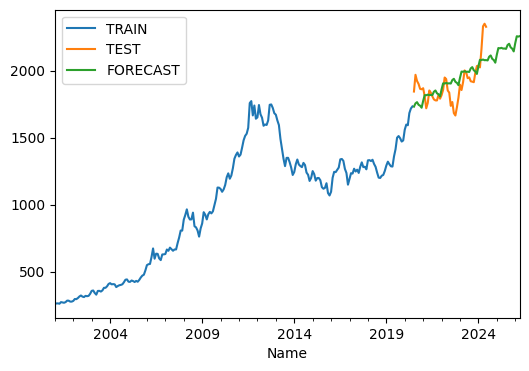

In [33]:
train['USD'].plot(legend=True,label='TRAIN')
test['USD'].plot(legend=True,label='TEST',figsize=(6,4))
y_forecast.plot(legend=True,label='FORECAST')
plt.show()

In [31]:
# prompt: code to calculate MAPE

from sklearn.metrics import mean_absolute_percentage_error
y_pred = final_tes_model.forecast(48)
mape = mean_absolute_percentage_error(test, y_pred)
print(mape)


0.048897543645821016


The mean absolute error for trend additive for this smoothing model is 93.00362903276296 <br> and Mean Absolute Percentage error is 0.048897543645821016.